In [1]:
import json
import pandas as pd
# import textacy
# from textacy.io.json import read_json
import spacy
import random
import scipy
import numpy as np

# Note that GCC doesn't really help...
# Try this?
# CPPFLAGS="-std=c++98" pip install cld2-cffi

# This only really gets used to create the dataset. You _dont_ have to install this if you don't want to.

# def doc_stream():
#     c = 0
#     with open('./yelp.json') as jfile:
#         for obj in json.load(jfile):
#             if c >= 10000:
#                 break
#             if obj['stars'] != [] and random.randint(0, 10) == 0:
#                 c += 1
#                 print('.', end='')
#                 yield textacy.Doc(obj['review'][0], lang='en', metadata={'stars': obj['stars'], 'restaurant': obj['restaurant']})
                
# corpus = textacy.Corpus('en', docs=doc_stream())

# corpus

# vectorizer = textacy.Vectorizer(norm='l2', apply_idf=True, idf_type='smooth', min_df=5, max_df=0.95)
# doc_term_matrix = vectorizer.fit_transform((doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True) for doc in corpus))
# 

# scipy.sparse.save_npz('./corpus.npz', doc_term_matrix)
# 

# y = np.array([c.metadata['stars'] for c in corpus])

# np.save('./ratings.npy', y)

In [2]:
y = np.load('./ratings.npy')
doc_term_matrix = scipy.sparse.load_npz('./corpus.npz')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(doc_term_matrix, y, test_size=0.2, random_state=42)

In [4]:
# Classifications

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifiers = [GaussianNB(),
               KNeighborsClassifier(n_neighbors=3), # This is slow as molasses
               RandomForestClassifier(random_state=42),
               SVC(),
               SVC(kernel='linear'),
               SGDClassifier()]

X_train, X_test, y_train, y_test = train_test_split(doc_term_matrix, y, test_size=0.2, random_state=42)

for clf in classifiers:
    clf.fit(X_train.toarray(), y_train)
    y_pred = clf.predict(X_test.toarray())
    print('Classifier {}'.format(clf))
    print('-' * 30)
    print(classification_report(y_test, y_pred))
    print('-' * 30)

# Precision is TP / TP + FP: So how many out of the positives were actually right?
# Recall is TP / TP + FN: So how many of the relevant elements were selected to begin with?

Classifier GaussianNB(priors=None)
------------------------------
             precision    recall  f1-score   support

          1       0.17      0.47      0.25       194
          2       0.09      0.22      0.13       156
          3       0.14      0.16      0.15       287
          4       0.34      0.23      0.27       577
          5       0.51      0.24      0.33       786

avg / total       0.34      0.25      0.26      2000

------------------------------
Classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
------------------------------
             precision    recall  f1-score   support

          1       0.45    

/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
------------------------------
             precision    recall  f1-score   support

          1       0.62      0.46      0.53       194
          2       0.36      0.17      0.23       156
          3       0.35      0.23      0.28       287
          4       0.41      0.44      0.42       577
          5       0.59      0.74      0.66       786

avg / total       0.49      0.51      0.49      2000

------------------------------


/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Classifier SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
------------------------------
             precision    recall  f1-score   support

          1       0.58      0.48      0.53       194
          2       0.39      0.13      0.20       156
          3       0.40      0.12      0.18       287
          4       0.42      0.29      0.34       577
          5       0.52      0.86      0.64       786

avg / total       0.47      0.49      0.45      2000

------------------------------


In [ ]:
# Exercise: What other classifiers could you use?

# Are these any better or worse?

# Hint any ensemble classifier usually works really well in practice
# AdaBoost
# RandomForest with tweaks on it? These usually work very well!
# GradientBoost

# there is also Xgboost and CatBoost for extra points but you'll have to install something else.

In [6]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, ElasticNet, Ridge, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
regressors = [SGDRegressor(), 
              Lasso(), 
              LinearRegression(), 
              ElasticNet(),
              Ridge(),
              SVR(kernel='linear'),
              SVR(kernel='rbf')]

def print_results(reg, y_test, y_pred):
    print('Regression {}'.format(reg))
    print('-' * 30)
    print(mean_absolute_error(y_test, y_pred))
    print('-' * 30)

for reg in regressors:
    reg.fit(X_train.toarray(), y_train)
    y_pred = reg.predict(X_test.toarray())
    print_results(reg, y_test, y_pred)

/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Regression SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
------------------------------
0.9772048992240506
------------------------------
Regression Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
------------------------------
1.044075625
------------------------------
Regression LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
------------------------------
105477975.95579632
------------------------------
Regression ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
     

In [ ]:
# Exercise what other regressors could you use?

# Hint the ensemble regressors again tend to work well in practice
# We tried all the big ones tbh

# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

# AdaBoostRegressor
# BaggingRegressor
# GradientBoostingRegressor

# There is also Xgboost and CatBoost for extra points

/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2644476720300936e-18 / 1.1102230246251565e-16
  RuntimeWarning)


Best Alpha: [1.640819364318025] MAE: 0.7619208958237843


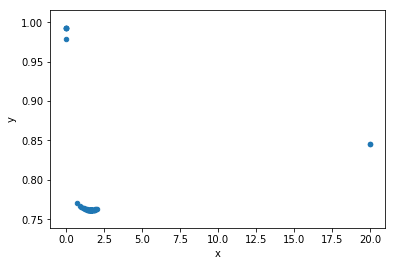

In [7]:
import dlib

xes = []
yes = []

def ridge_regressor(alpha):
    reg = Ridge(alpha=alpha)
    reg.fit(X_train.toarray(), y_train)
    y_pred = reg.predict(X_test.toarray())
    yes.append(mean_absolute_error(y_test, y_pred))
    xes.append(alpha)
    return mean_absolute_error(y_test, y_pred)

x, y = dlib.find_min_global(ridge_regressor, [1e-15], [20], 80)

import matplotlib.pyplot as plt

print("Best Alpha: {} MAE: {}".format(x, y))

pd.DataFrame({'x': xes, 'y': yes}).plot.scatter(x='x', y='y')
plt.show()

Best C: [0.33092015837141103] MAE: 0.771019835531833


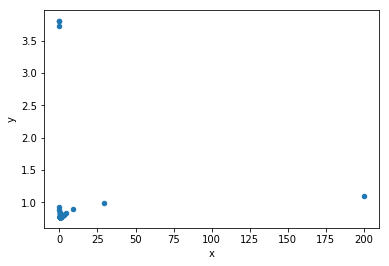

In [8]:
import dlib
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

# This is "bleeding" edge stuff here 
# http://blog.dlib.net/2017/12/a-global-optimization-algorithm-worth.html

xes = []
yes = []

def svr_regressor(c):
    reg = LinearSVR(C=c)
    reg.fit(X_train.toarray(), y_train)
    y_pred = reg.predict(X_test.toarray())
    yes.append(mean_absolute_error(y_test, y_pred))
    xes.append(c)
    return mean_absolute_error(y_test, y_pred)

x, y = dlib.find_min_global(svr_regressor, [1e-15], [200], 80)

print("Best C: {} MAE: {}".format(x, y))

pd.DataFrame({'x': xes, 'y': yes}).plot.scatter(x='x', y='y')
plt.show()

In [12]:
import autosklearn
import autosklearn.regression
import sklearn

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    output_folder='/tmp/autosklearn_regression_example_out',
    ml_memory_limit=5 * 1024
)

model = automl.fit(X_train.toarray(), y_train, dataset_name='viet_ratings', feat_type=['numerical'] * X_test.shape[1])

print(automl.show_models())
y_pred = automl.predict(X_test.toarray())
print("Mean absolute error:", sklearn.metrics.mean_absolute_error(y_test, y_pred))

/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2018-08-01 07:44:47,460:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!
[WARNING] [2018-08-01 07:44:47,470:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!
[WARNING] [2018-08-01 07:44:47,709:AutoMLSMBO(1)::viet_ratings] Could not find meta-data directory /home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2018-08-01 07:44:49,476:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!
[WARNING] [2018-08-01 07:44:51,480:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!
[WARNING] [2018-08-01 07:44:53,483:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!
[WARNING] [2018-08-01 07:44:55,487:EnsembleBuilder(1):viet_ratings] No models better than random - using Dummy Classifier!
[WARNING] [2018-08-01 07:44:57,494:Ense

/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[(1.000000, SimpleRegressionPipeline({'categorical_encoding:__choice__': 'one_hot_encoding', 'imputation:strategy': 'median', 'preprocessor:__choice__': 'extra_trees_preproc_for_regression', 'regressor:__choice__': 'ridge_regression', 'rescaling:__choice__': 'none', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'preprocessor:extra_trees_preproc_for_regression:bootstrap': 'False', 'preprocessor:extra_trees_preproc_for_regression:criterion': 'friedman_mse', 'preprocessor:extra_trees_preproc_for_regression:max_depth': 'None', 'preprocessor:extra_trees_preproc_for_regression:max_features': 0.4913357283128178, 'preprocessor:extra_trees_preproc_for_regression:max_leaf_nodes': 'None', 'preprocessor:extra_trees_preproc_for_regression:min_samples_leaf': 17, 'preprocessor:extra_trees_preproc_for_regression:min_samples_split': 13, 'preprocessor:extra_trees_preproc_for_regression:min_weight_fraction_leaf': 0.0, 'preprocessor:extra_trees_preproc_for_regression:n_estimators':

In [29]:
mod = automl.get_models_with_weights()[0][1]

mod._final_estimator.choice

RidgeRegression(alpha=1.0651486396143917, fit_intercept=True,
        random_state=<mtrand.RandomState object at 0x7f01cc1961b0>,
        tol=0.00442996035466757)